In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt


Here we explore sampling from a population. We make $n$ draws from a normal distribution $N(\mu, \sigma^2)$, and obtain the values $\{X_i\}$. We know that $E(X_i) = \mu$ and $\sigma^2 = E(X_i^2)-\mu^2$. We furthermore assume that the $X_i$ are independent. This means we can write $E(X_i X_j) = \mu^2 + \delta_{ij} \sigma^2$.

We do not know what the population parameters $\mu$ and $\sigma^2$ are, so we will seek to estimate them.

We define the sample mean as

$$\overline X = \frac{1}{n} \sum_{i=1}^{n} X_i$$

and the sample variance as

$$S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i-\overline X)^2$$

Because $E(X_i) = \mu$ it is easy to see that $E(\overline X) = \mu$, so that $\overline X$ is an unbiased estimator of $\mu$.

What is the variance of the sample mean?
$$
\begin{align}
Var(\overline X) &= E(\overline X^2) - E(\overline X)^2\\
&= \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n E(X_i X_j) - \mu^2\\
&= \frac{\sigma^2}{n}
\end{align}
$$
This is a classic result.

Is $S^2$ an unbiased estimator of $\sigma^2$? The answer is no
$$
\begin{align}
E(S^2) &= \frac{1}{n} \sum_{i=1}^n E(X_i^2) + E(\overline X^2) -2 E(X_i \overline X)\\
&=\sigma^2 + \mu^2 + \mu^2 + \sigma^2/n - 2\mu^2 - 2\sigma^2/n\\
&= \sigma^2 \frac{n-1}{n}
\end{align}
$$
We can construct a unbiased estimate $S'^2 = S^2 \frac{n}{n-1}$ if we wish. Of course, for large $n$ it makes little difference.

In [7]:
N = 6
Ns = 100000
np.random.seed( 20 )

pop_mean = 10
pop_std = 2

def generate_sample(N):
    samples = pop_mean + pop_std * np.random.randn(N)
    mean = samples.mean()
    variance = samples.var()
    return( mean, variance )

data = [ generate_sample(N) for i in range(Ns) ]
data = np.array( data )
means = data[:,0] # these are my Xbars, the means of randomly drawn samples
vars = data[:,1]  # these are my S^2s, the variances of randomly drawn samples


In [16]:
# demonstate that the variance of the sample mean is pop_var/Ns
sample_mean = means.mean() # this is E(Xbar)
var_sample_mean = np.dot(means - sample_mean, means - sample_mean )/Ns #this is Var(Xbar)
print( sample_mean, pop_mean )
print( var_sample_mean, pop_std**2/N)


10.003912238555491 10
0.6712169674194436 0.6666666666666666


In [37]:
import math
def mine(x, mu=0., sigma=1.):
    return( math.exp( -(x-mu)**2/2/sigma**2) / math.sqrt(2* math.pi*sigma**2) )
v = sp.norm.pdf( 0, loc=2, scale=1.3 )
m = mine( 0, 2, 1.3 )
[ v, m ]


[0.09397422369424545, 0.09397422369424545]

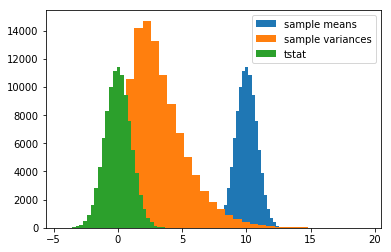

In [75]:

tstats = (means - sample_mean)/var_sample_mean**0.5

nbins=30
plt.hist( means, nbins, label='sample means' ); # N(pop_mean, pop_std^2/N)
plt.hist( vars, nbins, label='sample variances' ); # chi2 with N dofs?
plt.hist( tstats, nbins,label='tstat' ); # t-distribution?
plt.legend()


